### Identifying sets of metrics

We have some sets of metrics "pre-packaged" if you will, to look at what seems to be the interesting to compare summary stats between different runs, for some science goals. 
This notebook gives some examples of finding new sets of metrics to add to those packages, for comparing between runs. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorcet
from IPython.display import display
import rubin_sim.maf as maf

In [2]:
# Download the information on the families - this helps us load up related sets of simulations,
# while progressing in expected impact through survey simulation variations within each family.
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.1.json'
families = maf.archive.get_family_descriptions()
family_list = families.index.values

In [3]:
# Download the summary csv file -- note that metric names may change between major updates in the CSV file
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_28.csv'
summaries = maf.get_metric_summaries(summary_source='summary_2022_08_01.csv')

In [4]:
# Load the existing metric definition file -- this is what we'd like to update
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'
# Load it from a local copy 
metrics_source = 'metric_sets.json'
metric_set = maf.get_metric_sets(metrics_source)

Why bother to identify metrics, and not just use the things that are put together in the metric_sets.json file?

First - the metric sets may have older names for the metric outputs (maybe the summary statistic changed, maybe the metric itself was updated) or it very likely just doesn't include a set that matches what you want to compare. 
The metric_set dataframe isn't required for use with the summaries dataframe, but it makes life easier.
The metric_set dataframe can be used with the functions in `maf.summary_plots` to normalize the dataframe automatically (including inverting columns that should be inverted, and treating as magnitudes those that should be magnitudes), as well as to set linestyles, short cuts for the metric names, and prettier plots. 
See this [archive + summary_plots tutorial](https://github.com/lsst/rubin_sim_notebooks/blob/main/maf/tutorial/04_Getting_Data.ipynb) for extra information.

Let's try to identify some more sets to work into the pre-packaged metric_sets file. 

In [5]:
# What groups of metrics already exist?
msets = list(metric_set.groupby('metric set').first().index)
msets

for k in msets:
    print(k, len(metric_set.loc[k]))
    # Check that the metrics are correctly named and in the summary file
    summaries.loc[:, metric_set.loc[k]['metric']]

AGN N QSO 6
AGN SF 12
AGN SF DDF 36
AGN short 5
AGN timelag 12
DDF Cadence 48
DESC WFD 10
GP filters 12
GP footprint 6
GP season 6
GP visit 6
N Visits 9
SCOC 22
SL TDC 6
SRD 5
SSO N Objs 6
SSO discovery 14
SSO discovery options 22
SSO fraction 3 bands 14
SSO fraction 4 bands 14
SSO fraction 5 bands 14
SSO fraction 6 bands 14
SSO lightcurve inversion 8
Stars 9
TVS KNe 7
TVS KNe short 3
TVS PeriodModulation 8
TVS PeriodicDetect 6
TVS Presto 2
TVS TDE 5
TVS Tgaps 12
TVS XRB 3
TVS anomalies 5
TVS microlensing all 17
TVS microlensing short 4
TVS short 6
WFD Depths 18
cadence 8
galaxies 3
plot areas 5
radar 11
short description 10


In [6]:
# To see the details of one of these groups of metrics:
metric_set.loc['SRD']

,metric,short_name,style,invert,mag
metric,,,,,
fONv MedianNvis fO All sky HealpixSlicer,fONv MedianNvis fO All sky HealpixSlicer,fONv MedianNvis,k-,False,False
Median Parallax Uncert (18k) Parallax Uncert @ 22.4 All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @...,Med Parallax Uncert @22.4,c-,True,False
Median Parallax Uncert (18k) Parallax Uncert @ 24.0 All sky HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @...,Med Parallax Uncert @24.0,c:,True,False
Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motio...,Med PM Uncert @20.5,r-,True,False
Median Proper Motion Uncert (18k) Proper Motion Uncert @ 24.0 All sky HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motio...,Med PM Uncert @24.0,r:,True,False


See the [tutorial](https://github.com/lsst/rubin_sim_notebooks/blob/main/maf/tutorial/04_Getting_Data.ipynb) linked above for more information, but in short a group of metrics in a metric set give you the ability to more easily pull these metrics out of the summary file and normalize in a pre-defined way (do you need to invert the columns so 'bigger = better'? or are they magnitudes so should scale like 1-delta(m) instead of delta(m)?). 

## An Example ## 
An example of defining a group of metrics for the metric_set.

In [7]:
# Remove a metric set if necessary (say, to redefine it -- 
# -- for illustration sake, here we'll gather up WFD Depths again)
metric_set = metric_set.drop('WFD Depths', level='metric set')

msets = list(metric_set.groupby('metric set').first().index)
msets

['AGN N QSO',
 'AGN SF',
 'AGN SF DDF',
 'AGN short',
 'AGN timelag',
 'DDF Cadence',
 'DESC WFD',
 'GP filters',
 'GP footprint',
 'GP season',
 'GP visit',
 'N Visits',
 'SCOC',
 'SL TDC',
 'SRD',
 'SSO N Objs',
 'SSO discovery',
 'SSO discovery options',
 'SSO fraction 3 bands',
 'SSO fraction 4 bands',
 'SSO fraction 5 bands',
 'SSO fraction 6 bands',
 'SSO lightcurve inversion',
 'Stars',
 'TVS KNe',
 'TVS KNe short',
 'TVS PeriodModulation',
 'TVS PeriodicDetect',
 'TVS Presto',
 'TVS TDE',
 'TVS Tgaps',
 'TVS XRB',
 'TVS anomalies',
 'TVS microlensing all',
 'TVS microlensing short',
 'TVS short',
 'cadence',
 'galaxies',
 'plot areas',
 'radar',
 'short description']

Set up a new metric set and look at the outputs.  (here we'll just re-define the WFD Depths set)
Let's pretend we were interesting in evaluating why a particular simulation might be doing better for our metric -- did the depth per visit/coadded depth or number of visits change?

In [8]:
# If you have a general idea of the metric name, but don't know it specifically, 
# it can be helpful to narrow it down by searching through the columns in the summary dataframe
#  .. I tend to start as short as possible, and add more conditions to narrow it down
[m for m in summaries if "Coadd" in m and 'WFD' in m and 'Median' in m and 'Exgal' not in m]

['Median CoaddM5 WFD i band HealpixSubsetSlicer',
 'Median CoaddM5 WFD r band HealpixSubsetSlicer',
 'Median CoaddM5 WFD z band HealpixSubsetSlicer',
 'Median CoaddM5 WFD g band HealpixSubsetSlicer',
 'Median CoaddM5 WFD y band HealpixSubsetSlicer',
 'Median CoaddM5 WFD u band HealpixSubsetSlicer',
 'Median DD:WFD CoaddM5 y band HealpixSubsetSlicer',
 'Median DD:WFD CoaddM5 i band HealpixSubsetSlicer',
 'Median DD:WFD CoaddM5 r band HealpixSubsetSlicer',
 'Median DD:WFD CoaddM5 g band HealpixSubsetSlicer',
 'Median DD:WFD CoaddM5 z band HealpixSubsetSlicer',
 'Median DD:WFD CoaddM5 u band HealpixSubsetSlicer']

In [9]:
# We have to copy the *exact* metric name to find it in the summaries file
metrics = [f"Median CoaddM5 WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
metrics += [f"Mean Median fiveSigmaDepth WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
metrics += [f"Median NVisits WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
# But we can add shorter nanes for plot labels if we're sure to remember which one is which
short_names = [f"Median coadd depth {f} WFD" for f in 'ugrizy']
short_names += [f"Median single image depth {f} WFD" for f in 'ugrizy']
short_names += [f"Median NVisits {f} WFD" for f in 'ugrizy']
# Then we can add linestyles if desired - have to match length above
styles = (['c-', 'g-', 'y-', 'r-', 'm-', 'k-'] + ['c-.', 'g-.', 'y-.', 'r-.', 'm-.', 'k-.'] 
          + ['c:', 'g:', 'y:', 'r:', 'm:', 'k:'])
# Some of these are magnitude values, and we should normalize them differently (1+/- delta, not divide)
mags = [True]*6 + [True]*6 + [False]*6
# And we could invert metrics, if 'bigger was worse', but these are fine as-is
invert = False
new = maf.create_metric_set_df('WFD Depths', metrics, short_names, style=styles, mag=mags, invert=invert)
new

metric  \
metric set metric                                                                                                  
WFD Depths Median CoaddM5 WFD u band HealpixSubsetSlicer           Median CoaddM5 WFD u band HealpixSubsetSlicer   
           Median CoaddM5 WFD g band HealpixSubsetSlicer           Median CoaddM5 WFD g band HealpixSubsetSlicer   
           Median CoaddM5 WFD r band HealpixSubsetSlicer           Median CoaddM5 WFD r band HealpixSubsetSlicer   
           Median CoaddM5 WFD i band HealpixSubsetSlicer           Median CoaddM5 WFD i band HealpixSubsetSlicer   
           Median CoaddM5 WFD z band HealpixSubsetSlicer           Median CoaddM5 WFD z band HealpixSubsetSlicer   
           Median CoaddM5 WFD y band HealpixSubsetSlicer           Median CoaddM5 WFD y band HealpixSubsetSlicer   
           Mean Median fiveSigmaDepth WFD u band HealpixSu...  Mean Median fiveSigmaDepth WFD u band HealpixS...   
           Mean Median fiveSigmaDepth WFD g band HealpixSu...  Mean Median fiveSigmaDepth WFD g band HealpixS...   
           Mean Median fiveSigmaDepth WFD r band HealpixSu...  Mean Median fiveSigmaDepth WFD r band HealpixS...   
           Mean Median fiveSigmaDepth WFD i band HealpixSu...  Mean Median fiveSigmaDepth WFD i band HealpixS...   
           Mean Median fiveSigmaDepth WFD z band HealpixSu...  Mean Median fiveSigmaDepth WFD z band HealpixS...   
           Mean Median fiveSigmaDepth WFD y band HealpixSu...  Mean Median fiveSigmaDepth WFD y band HealpixS...   
           Median NVisits WFD u band HealpixSubsetSlicer           Median NVisits WFD u band HealpixSubsetSlicer   
           Median NVisits WFD g band HealpixSubsetSlicer           Median NVisits WFD g band HealpixSubsetSlicer   
           Median NVisits WFD r band HealpixSubsetSlicer           Median NVisits WFD r band HealpixSubsetSlicer   
           Median NVisits WFD i band HealpixSubsetSlicer           Median NVisits WFD i band HealpixSubsetSlicer   
           Median NVisits WFD z band HealpixSubsetSlicer           Median NVisits WFD z band HealpixSubsetSlicer   
           Median NVisits WFD y band HealpixSubsetSlicer           Median NVisits WFD y band HealpixSubsetSlicer   

                                                                                    short_name  \
metric set metric                                                                                
WFD Depths Median CoaddM5 WFD u band HealpixSubsetSlicer              Median coadd depth u WFD   
           Median CoaddM5 WFD g band HealpixSubsetSlicer              Median coadd depth g WFD   
           Median CoaddM5 WFD r band HealpixSubsetSlicer              Median coadd depth r WFD   
           Median CoaddM5 WFD i band HealpixSubsetSlicer              Median coadd depth i WFD   
           Median CoaddM5 WFD z band HealpixSubsetSlicer              Median coadd depth z WFD   
           Median CoaddM5 WFD y band HealpixSubsetSlicer              Median coadd depth y WFD   
           Mean Median fiveSigmaDepth WFD u band HealpixSu...  Median single image depth u WFD   
           Mean Median fiveSigmaDepth WFD g band HealpixSu...  Median single image depth g WFD   
           Mean Median fiveSigmaDepth WFD r band HealpixSu...  Median single image depth r WFD   
           Mean Median fiveSigmaDepth WFD i band HealpixSu...  Median single image depth i WFD   
           Mean Median fiveSigmaDepth WFD z band HealpixSu...  Median single image depth z WFD   
           Mean Median fiveSigmaDepth WFD y band HealpixSu...  Median single image depth y WFD   
           Median NVisits WFD u band HealpixSubsetSlicer                  Median NVisits u WFD   
           Median NVisits WFD g band HealpixSubsetSlicer                  Median NVisits g WFD   
           Median NVisits WFD r band HealpixSubsetSlicer                  Median NVisits r WFD   
           Median NVisits WFD i band HealpixSubsetSlicer                  Median NVisits i WFD   
           Median NVi

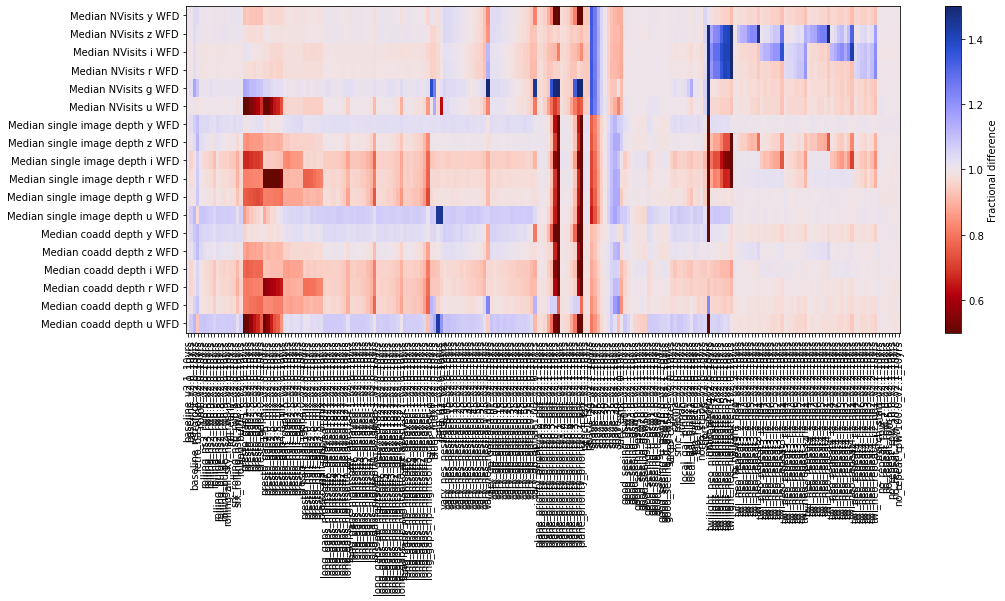

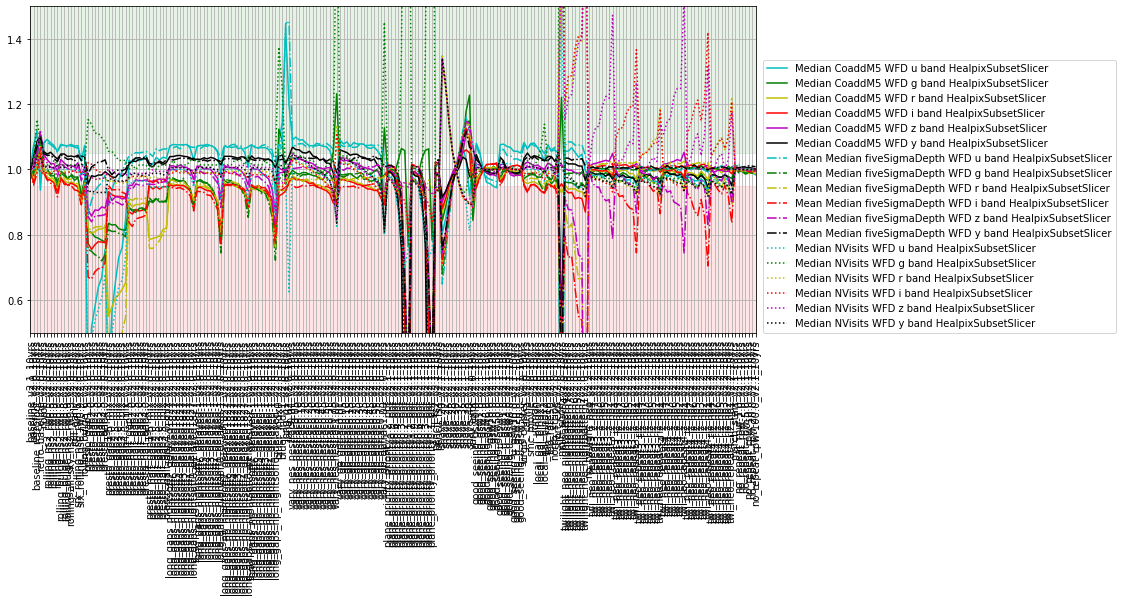

In [10]:
# Look at metric results
k = 'WFD Depths'

fams = [f for f in family_list if not f.startswith('ddf')]

these_runs = families.explode('run').loc[fams]['run']
baseline = 'baseline_v2.1_10yrs'

# For a lot of runs or a lot of metrics, the mesh can work best
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, new.loc[k]['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=new.loc[k]['short_name'],
                                  metric_set=new.loc[k], 
                                  color_range=1)
fig.set_figwidth(16)

# But the line plots can be good too, especially for smaller sets of values
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new.loc[k]['metric']], 
                              baseline_run=baseline,
                              metric_set=new.loc[k],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

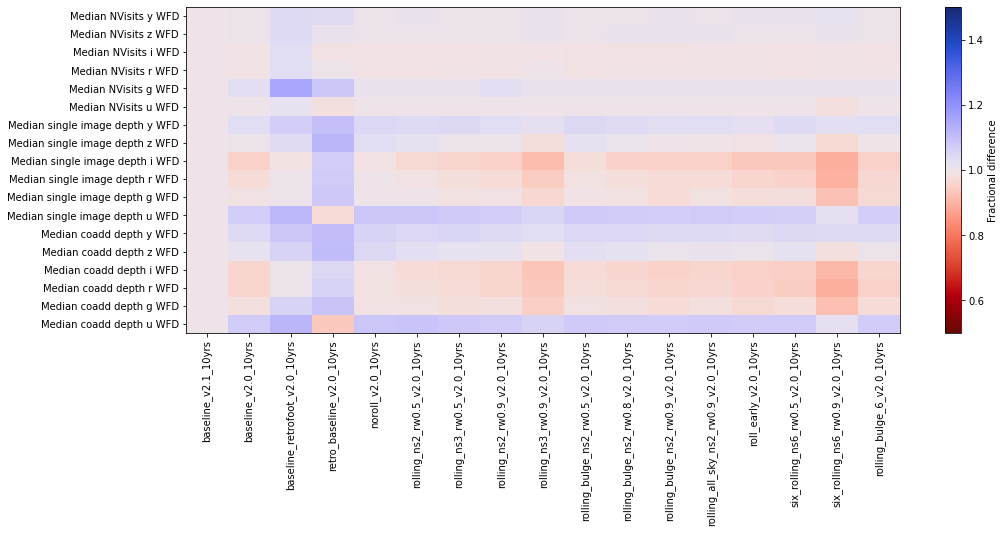

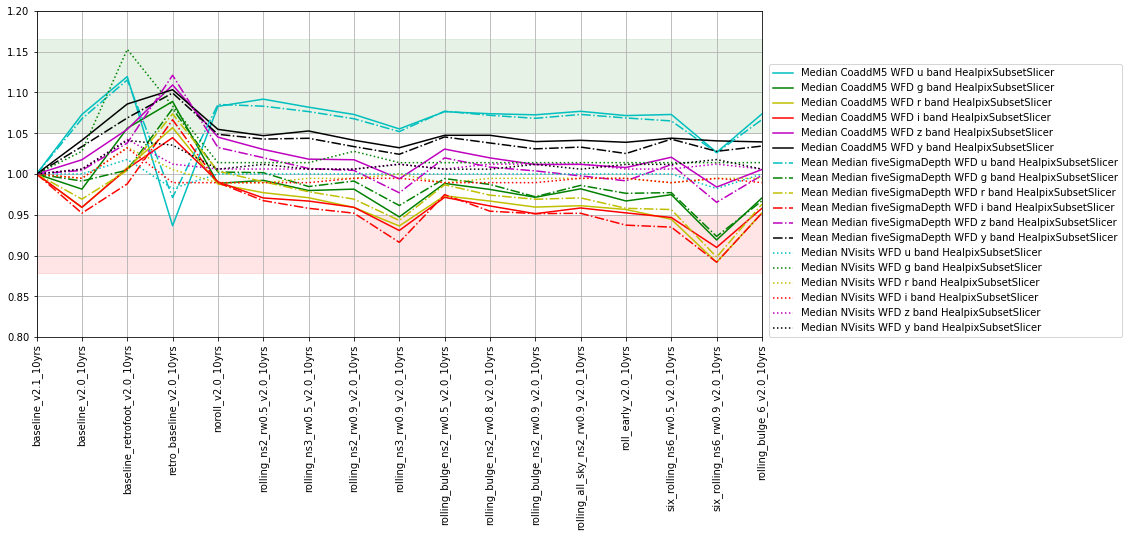

In [11]:
# Maybe look closer at some families 
k = 'WFD Depths'
fams = ['baseline', 'rolling']
these_runs = families.explode('run').loc[fams]['run']
baseline = 'baseline_v2.1_10yrs'

# For a lot of runs or a lot of metrics, the mesh can work best
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, new.loc[k]['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=new.loc[k]['short_name'],
                                  metric_set=new.loc[k], 
                                  color_range=1)
fig.set_figwidth(16)

# But the line plots can be good too, especially for smaller sets of values
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new.loc[k]['metric']], 
                              baseline_run=baseline,
                              metric_set=new.loc[k],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.8, 1.2)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

In [12]:
# Write this new set back into the metric_sets if desired 
tmp = pd.concat([metric_set, new])
maf.write_metric_sets('metric_sets_new.json', tmp)

In [13]:
# Check the new file is readable
metrics_source = 'metric_sets_new.json'
nn = maf.get_metric_sets(metrics_source)

## Another example ##

In [14]:
metric_set = metric_set.drop('TVS Tgaps', level='metric set')

In [15]:
# Let's add and modify another one where we also want to sort in ugrizy order
[m for m in summaries if 'Tgaps' in m and "Median" in m and '2-14' in m]

['Median TgapsPercent_2-14hrs y band HealpixSlicer',
 'Median TgapsPercent_2-14hrs g band HealpixSlicer',
 'Median TgapsPercent_2-14hrs i band HealpixSlicer',
 'Median TgapsPercent_2-14hrs r band HealpixSlicer',
 'Median TgapsPercent_2-14hrs z band HealpixSlicer',
 'Median TgapsPercent_2-14hrs u band HealpixSlicer']

In [16]:
# Let's sort them in ugrizy order
filtercolors = ['c', 'g', 'y', 'r', 'm', 'k']
tmp = [m for m in summaries if 'Tgaps' in m and "Median" in m and '2-14' in m]
metrics = []
for f in 'ugrizy':
    metrics += [m for m in tmp if f'{f} band' in m]
tmp = [m for m in summaries if 'Tgaps' in m and '1day' in m and 'Median' in m]
for f in 'ugrizy':
    metrics += [m for m in tmp if f'{f} band' in m]
metrics
short_names = [m.replace('HealpixSlicer' , '').rstrip(' ') for m in metrics]
styles = [f'{f}-' for f in filtercolors] + [f'{f}:' for f in filtercolors]
mset = maf.create_metric_set_df('TVS Tgaps',  metrics, short_names, style=styles, invert=False, mag=False)

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/runComparison/summary_plots.py:326: UserWarning: There are infinite values in the plot of Median TgapsPercent_2-14hrs u band HealpixSlicer.
  warnings.warn(f"There are infinite values in the plot of {idx}.")
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/runComparison/summary_plots.py:326: UserWarning: There are infinite values in the plot of Median TgapsPercent_2-14hrs g band HealpixSlicer.
  warnings.warn(f"There are infinite values in the plot of {idx}.")


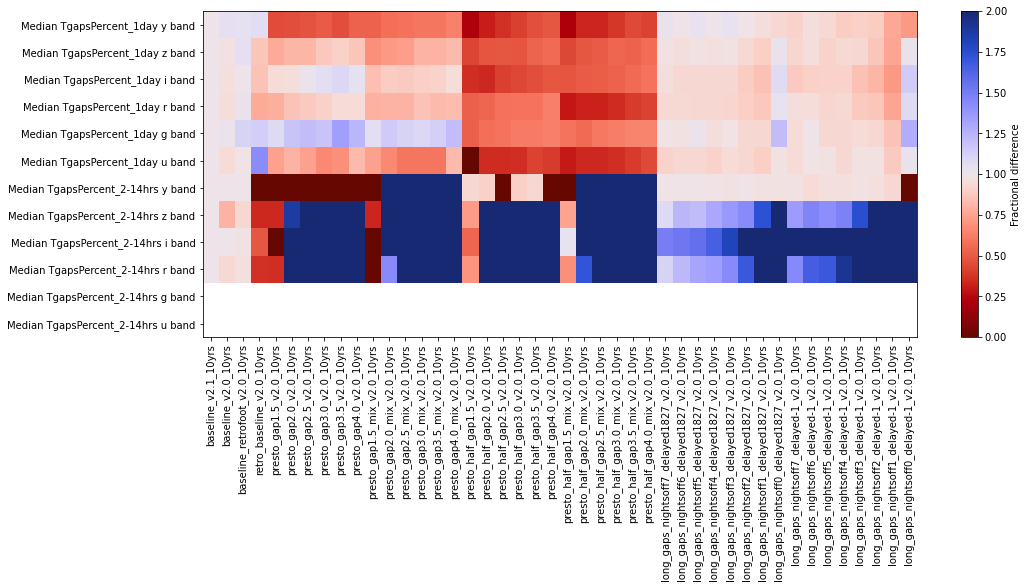

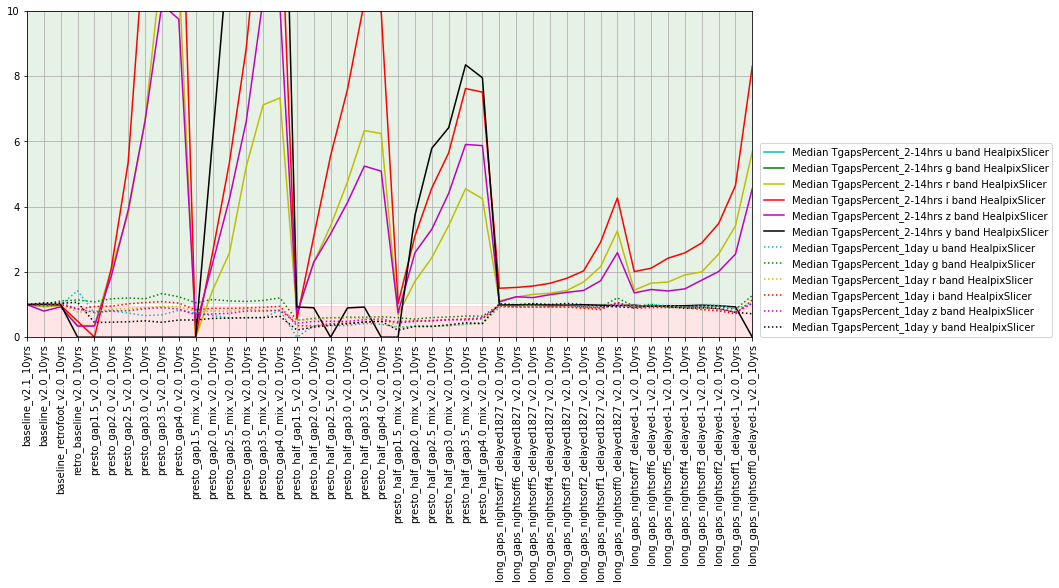

In [17]:
mm = mset.loc['TVS Tgaps']
fams = ['baseline', 'triplets']
these_runs = families.explode('run').loc[fams]['run']
baseline = 'baseline_v2.1_10yrs'
#baseline = None

# For a lot of runs or a lot of metrics, the mesh can work best
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=2)
fig.set_figwidth(16)

# But the line plots can be good too, especially for smaller sets of values
fig, ax = maf.plot_run_metric(summaries.loc[these_runs,mm['metric']], 
                              baseline_run=baseline,
                              metric_set=mm,
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0, 10)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

Oh my - TgapsPercent in u band amd tband is likely 0 in the baseline. Is it everywhere zero?
Could drop it if so .. but it's not everywhere. So we'll leave it, but this will give the error message each time.

In [18]:
k = 'Median TgapsPercent_2-14hrs u band HealpixSlicer'
good = np.where(summaries[k] > 0)[0]
display(summaries.iloc[good][k][:5])

k = 'Median TgapsPercent_2-14hrs g band HealpixSlicer'
good = np.where(summaries[k] > 0)[0]
display(summaries.iloc[good][k][:5])

run
carina_v2.0_10yrs                            1.538462
too_rate50_v2.0_10yrs                        1.562500
six_rolling_ns6_rw0.9_v2.0_10yrs             1.562500
long_gaps_nightsoff7_delayed-1_v2.0_10yrs    1.515152
retro_baseline_v2.0_10yrs                    1.562500
Name: Median TgapsPercent_2-14hrs u band HealpixSlicer, dtype: float64

run
long_gaps_nightsoff1_delayed1827_v2.0_10yrs       1.388889
presto_half_gap2.5_mix_v2.0_10yrs                 4.347826
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs      4.166667
long_gaps_nightsoff4_delayed1827_v2.0_10yrs       1.298701
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs    1.492537
Name: Median TgapsPercent_2-14hrs g band HealpixSlicer, dtype: float64

So I would probably go to the plots of these metrics in these runs on http://astro-lsst-01.astro.washington.edu:8080  to see if this is unusual everywhere over the sky or only in some local spots 
(doesn't seem to be confined to a particular point on the sky though). 

In [19]:
metric_set = pd.concat([metric_set, mset])
maf.write_metric_sets('metric_sets_new.json', metric_set)

## A different example ##

This is a different sort of example -- combining (sub) sets of different metric_set groups to make a new metric_set to use in a call to plot_run_metric (or plot_run_metric_mesh). 

In [20]:
# pandas lets you query the contents of the array to find matching rows
qq = 'metric.str.contains("Gap WFD") or metric.str.contains("Cadence")'
mm = metric_set.loc[['cadence', 'SL TDC']].query(qq, engine='python')
mm

metric  \
metric set metric                                                                                                  
cadence    Median Median Intra-Night Gap WFD HealpixSubset...  Median Median Intra-Night Gap WFD HealpixSubse...   
           Median Median Inter-Night Gap WFD u band Healpi...  Median Median Inter-Night Gap WFD u band Healp...   
           Median Median Inter-Night Gap WFD g band Healpi...  Median Median Inter-Night Gap WFD g band Healp...   
           Median Median Inter-Night Gap WFD r band Healpi...  Median Median Inter-Night Gap WFD r band Healp...   
           Median Median Inter-Night Gap WFD i band Healpi...  Median Median Inter-Night Gap WFD i band Healp...   
           Median Median Inter-Night Gap WFD z band Healpi...  Median Median Inter-Night Gap WFD z band Healp...   
           Median Median Inter-Night Gap WFD y band Healpi...  Median Median Inter-Night Gap WFD y band Healp...   
           Median Median Inter-Night Gap WFD all bands Hea...  Median Median Inter-Night Gap WFD all bands He...   
SL TDC     Median TDC_Cadence  HealpixSlicer                                   Median TDC_Cadence  HealpixSlicer   

                                                                                         short_name  \
metric set metric                                                                                     
cadence    Median Median Intra-Night Gap WFD HealpixSubset...            Median WFD Intra-Night Gap   
           Median Median Inter-Night Gap WFD u band Healpi...          Median WFD Inter-Night Gap u   
           Median Median Inter-Night Gap WFD g band Healpi...          Median WFD Inter-Night Gap g   
           Median Median Inter-Night Gap WFD r band Healpi...          Median WFD Inter-Night Gap r   
           Median Median Inter-Night Gap WFD i band Healpi...          Median WFD Inter-Night Gap i   
           Median Median Inter-Night Gap WFD z band Healpi...              Median Inter-Night Gap z   
           Median Median Inter-Night Gap WFD y band Healpi...          Median WFD Inter-Night Gap y   
           Median Median Inter-Night Gap WFD all bands Hea...  Median WFD Inter-Night Gap all bands   
SL TDC     Median TDC_Cadence  HealpixSlicer                                     Median TDC_Cadence   

                                                              style  invert  \
metric set metric                                                             
cadence    Median Median Intra-Night Gap WFD HealpixSubset...    k-    True   
           Median Median Inter-Night Gap WFD u band Healpi...    c:    True   
           Median Median Inter-Night Gap WFD g band Healpi...    g:    True   
           Median Median Inter-Night Gap WFD r band Healpi...    y:    True   
           Median Median Inter-Night Gap WFD i band Healpi...    r:    True   
           Median Median Inter-Night Gap WFD z band Healpi...    m:    True   
           Median Median Inter-Night Gap WFD y band Healpi...    k:    True   
           Median Median Inter-Night Gap WFD all bands Hea...   k--    True   
SL TDC     Median TDC_Cadence  HealpixSlicer                     g:    True   

                                                                 mag  
metric set metric                                                     
cadence    Median Median Intra-Night Gap WFD HealpixSubset...  False  
           Median Median Inter-Night Gap WFD u band Healpi...  False  
           Median Median Inter-Night Gap WFD g band Healpi...  False  
           Median Median Inter-Night Gap WFD r band Healpi...  False  
           Median Median Inter-Night Gap WFD i band Healpi...  False  
           Median Median Inter-Night Gap WFD z band Healpi...  False  
           Median Median Inter-Night Gap WFD y band Healpi...  False  
           Median Median Inter-Night Gap WFD all bands Hea...  False  
SL TDC     Median TDC_Cadence  HealpixSlicer                   False

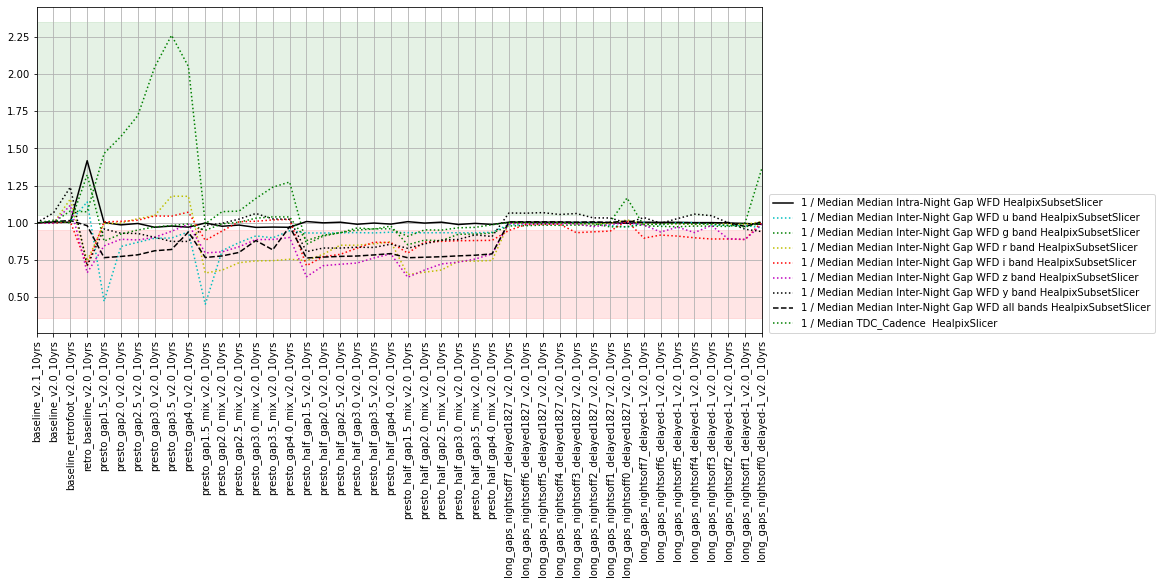

In [21]:
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, mm['metric']], 
                              baseline_run=baseline,
                              metric_set=mm,
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
#ax.set_ylim(0.8, 1.2)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

In [22]:
summaries.loc[these_runs, mm['metric']]

metric,Median Median Intra-Night Gap WFD HealpixSubsetSlicer,Median Median Inter-Night Gap WFD u band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD g band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD r band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD i band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD z band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD y band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD all bands HealpixSubsetSlicer,Median TDC_Cadence HealpixSlicer
run,,,,,,,,,
baseline_v2.1_10yrs,0.552201,26.026713,20.441890,5.952914,7.046276,7.981944,14.873708,3.024632,8.836803
baseline_v2.0_10yrs,0.549408,26.070302,20.365116,5.971442,7.065387,8.007021,13.945916,3.000684,8.688228
baseline_retrofoot_v2.0_10yrs,0.550094,25.833434,18.935630,5.133674,6.996897,7.137681,11.999598,2.977837,8.843396
retro_baseline_v2.0_10yrs,0.389526,22.817477,19.036966,8.001297,9.848155,12.012264,20.926189,3.083906,6.679751
presto_gap1.5_v2.0_10yrs,0.550978,55.066855,13.942192,5.986631,7.002425,9.444643,15.511257,3.948543,10.075625
presto_gap2.0_v2.0_10yrs,0.559929,30.948382,12.933577,5.959651,6.976328,8.972874,15.994526,3.907646,9.556976
presto_gap2.5_v2.0_10yrs,0.554663,29.942795,11.879309,5.790955,6.925585,9.022343,16.021235,3.852988,9.285504
presto_gap3.0_v2.0_10yrs,0.569107,29.023683,9.989546,5.675868,6.734949,8.840720,16.476915,3.724076,9.088140
presto_gap3.5_v2.0_10yrs,0.564397,28.995196,9.043253,5.048806,6.742847,8.463744,17.001180,3.684799,8.996770


(BTW, slightly off-topic but the reason for the difference in the metrics above, even though they're both measuring cadence, is that (at each healpix gridpoint) the median inter-night gap is looking at the median inter-night gaps over all time; the TDC_cadence metric is looking at the mean of the mean values of the inter-night gap within each season. The mean value within a season is fine; looking at the mean across all seasons leads to the lower-cadence seasons weighing more heavily on the final evaluation of the cadence gap. The median value across all time will represent the typical time separation of most visits, while the mean of the mean gives more weighting to the spacing of visits that are slow-paced. Both are valid, but measure subtly different things). 